# Hierarchical Clustering

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import seaborn as sns
from sklearn import metrics
# Đọc dữ liệu từ file CSV
data = pd.read_csv(r'../data.csv')
data = data.drop(columns='Title')
# Hiển thị kích thước và thông tin của dữ liệu
print(data.shape)
data.info()
data.head()


(732, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price sale        732 non-null    float64
 1   CPU               732 non-null    float64
 2   Ram               732 non-null    float64
 3   Storage           732 non-null    float64
 4   Operating system  732 non-null    float64
 5   Brand             732 non-null    float64
 6   Screen size       732 non-null    float64
 7   discount          732 non-null    float64
dtypes: float64(8)
memory usage: 45.9 KB


,Price sale,CPU,Ram,Storage,Operating system,Brand,Screen size,discount
0,0.069532,0.7,0.011765,0.098592,1.0,0.125,0.557522,0.114894
1,0.111426,0.1,0.011765,0.098592,1.0,0.750,0.628319,0.127660
2,0.077640,0.7,0.011765,0.098592,1.0,0.500,0.557522,0.072340
3,0.070883,0.8,0.011765,0.098592,1.0,0.000,0.628319,0.106383
4,0.118184,0.8,0.011765,0.098592,1.0,0.500,0.526549,0.106383



## Tách dữ liệu thành tập huấn luyện và tập kiểm tra (80% - 20%)

In [46]:

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [47]:

data_train = pd.read_csv('train_data.csv')
print(data_train.shape)

data_test = pd.read_csv('test_data.csv')
print(data_test.shape)

(585, 8)
(147, 8)


huấn luyện mô hình

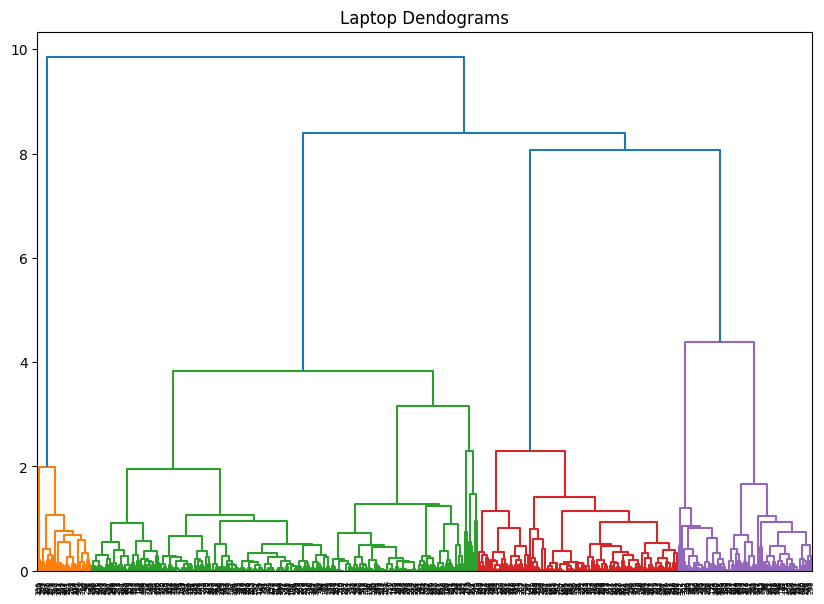

In [52]:
plt.figure(figsize=(10, 7))  
plt.title("Laptop Dendograms")  
dend = sch.dendrogram(sch.linkage(train_data, method='ward')) 

In [49]:
inertia_values = []
for k in range(2,15):
    cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster.fit_predict(data) 
    print (k, metrics.calinski_harabasz_score(data,cluster.labels_))
    

2 289.0842194198501
3 354.81246975859557
4 522.2160171880956
5 505.4950961593695
6 513.661366697687
7 504.8984873707607
8 482.86774762117443
9 467.99329135623844
10 457.81814413957363
11 444.32871069138986
12 434.80089195024385
13 428.2707526279853
14 416.188963420807


In [74]:

num_clusters = 4
cluster_indices = dend['leaves'][:num_clusters]

## Tìm ra đặc trưng chung của từng cụm
cluster_features = []
for index in cluster_indices:
    cluster_data = train_data.iloc[index]
    common_features = cluster_data[cluster_data > 0.6].index.tolist()  # Chọn các đặc trưng có giá trị lớn hơn 0.5
    cluster_features.append(common_features)
# In ra tên của mỗi cụm dựa trên đặc trưng chung
for i, features in enumerate(cluster_features):
    print(f"Cụm {i+1}: {', '.join(features)}")

    


Cụm 1: Brand, discount
Cụm 2: Brand, Screen size, discount
Cụm 3: Brand, Screen size, discount
Cụm 4: CPU, Brand, Screen size


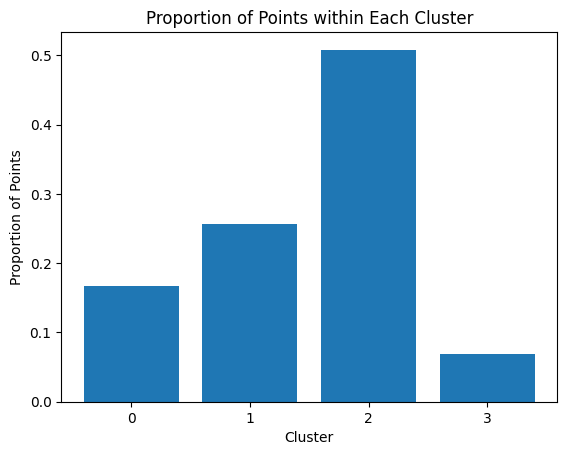

In [50]:
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = cluster.fit_predict(data)

# Get the count of points in each cluster
cluster_counts = np.bincount(cluster_labels)

# Plot the proportion of points within each cluster
plt.bar(range(4), cluster_counts / len(data), align='center')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Points')
plt.title('Proportion of Points within Each Cluster')
plt.xticks(range(4))
plt.show()

In [51]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
k=4
def evaluate_cluster_model(data_train, data_test, method='ward'):
    num_clusters = range(2, 11)

    silhouette_scores_train = []
    silhouette_scores_test = []
    calinski_harabasz_scores_train = []
    calinski_harabasz_scores_test = []
    davies_bouldin_scores_train = []
    davies_bouldin_scores_test = []

    for k in num_clusters:
        # Train Hierarchical Clustering model
        Z_train = sch.linkage(data_train, method=method)
        train_clusters = sch.fcluster(Z_train, k, criterion='maxclust')

        # Predict clusters for test data
        Z_test = sch.linkage(data_test, method=method)
        test_clusters = sch.fcluster(Z_test, k, criterion='maxclust')

        
        # Calculate silhouette score for training data
        silhouette_scores_train.append(silhouette_score(data_train, train_clusters))

        # Calculate silhouette score for test data
        silhouette_scores_test.append(silhouette_score(data_test, test_clusters))

        # Calculate Calinski-Harabasz index for training and test data
        calinski_harabasz_scores_train.append(calinski_harabasz_score(data_train, train_clusters))
        calinski_harabasz_scores_test.append(calinski_harabasz_score(data_test, test_clusters))

        # Calculate Davies-Bouldin index for training and test data
        davies_bouldin_scores_train.append(davies_bouldin_score(data_train, train_clusters))
        davies_bouldin_scores_test.append(davies_bouldin_score(data_test, test_clusters))

    # Find optimal number of clusters based on silhouette score on test data
    optimal_num_clusters = num_clusters[np.argmax(silhouette_scores_test)]

    print("\nĐánh giá mô hình phân cụm Hierarchical Clustering cho số lượng cụm tối ưu:")
    print("Silhouette Score trên tập huấn luyện:", silhouette_scores_train[optimal_num_clusters - 2])
    print("Silhouette Score trên tập kiểm tra:", silhouette_scores_test[optimal_num_clusters - 2])
    print("Calinski-Harabasz Index trên tập huấn luyện:", calinski_harabasz_scores_train[optimal_num_clusters - 2])
    print("Calinski-Harabasz Index trên tập kiểm tra:", calinski_harabasz_scores_test[optimal_num_clusters - 2])
    print("Davies-Bouldin Index trên tập huấn luyện:", davies_bouldin_scores_train[optimal_num_clusters - 2])
    print("Davies-Bouldin Index trên tập kiểm tra:", davies_bouldin_scores_test[optimal_num_clusters - 2])

# Sử dụng hàm để đánh giá mô hình phân cụm
evaluate_cluster_model(data_train, data_test)



Đánh giá mô hình phân cụm Hierarchical Clustering cho số lượng cụm tối ưu:
Silhouette Score trên tập huấn luyện: 0.5353997329891528
Silhouette Score trên tập kiểm tra: 0.5512022104720785
Calinski-Harabasz Index trên tập huấn luyện: 232.4314265655207
Calinski-Harabasz Index trên tập kiểm tra: 56.543635780000315
Davies-Bouldin Index trên tập huấn luyện: 0.6056066441095245
Davies-Bouldin Index trên tập kiểm tra: 0.5476045262040735
